<a href="https://colab.research.google.com/github/mattsmiths/biol470/blob/main/week1/simple_pose_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Click to import libraries
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [ ]:
file_name = 'CHANGE ME TO YOUR FILE DIRECTORY PATH' # This will start with /content/ (then your filename)

In [ ]:
# read in your CSV data
data = pd.read_csv(file_name)

In [ ]:
# Get a preview
data.head()

,Unnamed: 0,Nose,Left Eye,Right Eye,Left Ear,Right Ear,Left Shoulder,Right Shoulder,Left Elbow,Right Elbow,Left Wrist,Right Wrist,Left Hip,Right Hip,Left Knee,Right Knee,Left Ankle,Right
0,0,1.667938,0.901779,1.067215,-0.922653,-0.479553,0.768372,-0.576447,-0.892151,-1.123260,-0.439056,-1.990814,-0.114349,-0.878754,0.548248,1.860077,-2.477234,-0.674255
1,1,2.411728,2.018234,2.725540,0.317230,1.954712,0.179367,-0.008423,-0.503357,-0.443726,-0.766571,3.697891,1.138519,0.947601,2.713623,2.705750,1.157318,4.630249
2,2,0.982635,0.432434,1.033844,-1.212158,0.164093,-0.432800,-1.711746,-1.456848,-6.731995,-1.069977,0.005493,-1.264496,-1.411758,-3.775482,0.542252,-2.723511,2.719757
3,3,1.967850,1.644363,1.508270,0.839157,0.277954,0.036011,0.522949,1.983124,3.268921,0.633942,2.058792,-2.176300,-1.966217,-1.201782,-0.564377,-5.702759,-5.873200
4,4,0.733047,1.310135,0.197327,1.655868,0.272964,-2.903122,0.641571,1.963623,7.085114,0.511230,3.443420,-2.957977,0.698441,-0.711456,11.827026,3.592316,20.251770


In [ ]:
get_node_names = list(data.keys())[1:]

Below is a dropdown menu where you can select specific nodes to plot

You selected: Right Elbow


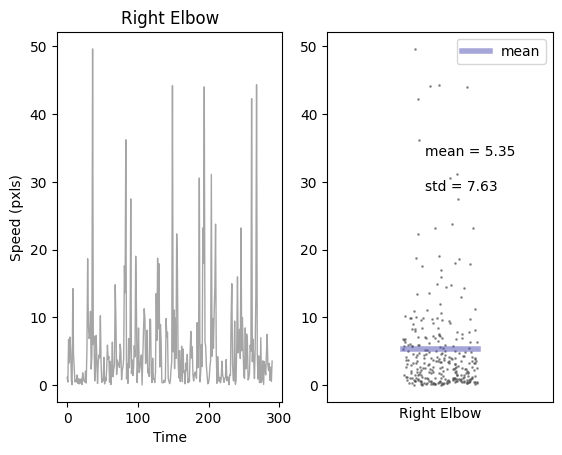

In [ ]:
node_selection = 'Right Elbow' #@param ['Nose', 'Left Eye', 'Right Eye', 'Left Ear', 'Right Ear', 'Left Shoulder', 'Right Shoulder', 'Left Elbow', 'Right Elbow', 'Left Wrist', 'Right Wrist', 'Left Hip', 'Right Hip', 'Left Knee', 'Right Knee', 'Left Ankle', 'Right']


print('You selected:', node_selection)


data_select = abs(data[node_selection].values)

plt.subplot(1,2,1)
plt.plot(data_select,color=(0.3,0.3,0.3,0.5),linewidth=1)
plt.title(node_selection)
plt.ylabel('Speed (pxls)')
plt.xlabel('Time')
plt.subplot(1,2,2)

x_noise = np.random.rand(len(data_select))
plt.scatter(x_noise,data_select,color=(0.3,0.3,0.3,0.5),s=1)
plt.xlabel(node_selection)
mm = np.nanmean(data_select)
ss = np.nanstd(data_select)
plt.plot([0,1],[mm,mm],linewidth=4,color=(0.3,0.3,0.7,0.5),label='mean')
plt.legend()
plt.xlim([-1,2])
plt.xticks([])
a1= plt.axis()
x1 = a1[1]*0.15
y1 = a1[3]*0.65
plt.text(x1,y1,'mean = '+str(round(mm,2)))

x1 = a1[1]*0.15
y1 = a1[3]*0.55
plt.text(x1,y1,'std = '+str(round(ss,2)))

plt.savefig('/content/%s.png'%node_selection,dpi=200)


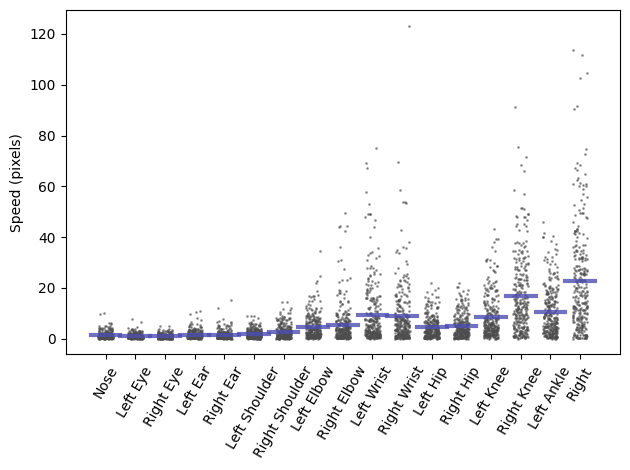

In [ ]:
#@title Plotting all speeds of nodes in single plot
from matplotlib.artist import get
for ind,temp_node in enumerate(get_node_names):

  ind+=1

  data_select = abs(data[temp_node].values)
  x_noise = (np.random.rand(len(data_select))*0.5)+ind+0.25

  plt.scatter(x_noise,data_select,color=(0.3,0.3,0.3,0.5),s=1)
  mm = np.nanmean(data_select)
  ss = np.nanstd(data_select)
  plt.plot([ind,ind+1],[mm,mm],linewidth=3,color=(0.3,0.3,0.7,0.8),label='mean')
plt.ylabel('Speed (pixels)')
plt.xticks(np.arange(1.5,len(get_node_names)+1.5),get_node_names,rotation=60)
plt.tight_layout()
plt.savefig('/content/compare_speeds.png',dpi=200)